In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2)
from sklearn import datasets, linear_model
import pandas as pd
# import sys
# from sklearn.metrics import mean_squared_error
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from keras.models import load_model
# from tensorflow.keras.layers import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
# from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers import RMSprop
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping
from PIL import Image, ImageChops, ImageEnhance
# import itertools

import cv2
from tqdm import tqdm
# from sklearn.model_selection import train_test_split

from google.colab.patches import cv2_imshow
from keras import regularizers
from google.colab.patches import cv2_imshow
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

Augmentation

In [ ]:
#data augmentation padhna hai
datagen=ImageDataGenerator(

    # rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,`1`
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
    vertical_flip=True,
    # fill_mode='nearest'
)

In [ ]:
path="/content/drive/MyDrive/Dataset"

In [ ]:
os.makedirs("/content/drive/MyDrive/datasetaugmentss")

In [ ]:
count=1
for file in tqdm(os.listdir(path)):

    os.makedirs(f"/content/drive/MyDrive/datasetaugmentss/Augment_{file}")
#     print(file)
    p=path+"/"+file
    p2="/content/drive/MyDrive/datasetaugmentss"+"/"+f"Augment_{file}"
    for f in os.listdir(p):
        img1=load_img(p+"/"+f)
        x1=img_to_array(img1)
        n=f.split(".")[0]
        cv2.imwrite(f"{p2}+'/'+{n}.jpg",x1)
        x1=x1.reshape((1,) + x1.shape)
        i=0
        for batch in datagen.flow(x1,batch_size=1,save_to_dir=f"/content/drive/MyDrive/datasetaugmentss/Augment_{file}",save_prefix=file+"_"+str(count),save_format='jpeg'):
            i=i+1
            count=count+1
            if i==1:
                break
        

In [ ]:
dirs=os.listdir('/content/drive/MyDrive/datasetaugmentss/Augment_spliced')

In [ ]:

count=0
for i in dirs:
  # print(i)
  count=count+1
print(count)

1828


Segmentation

In [ ]:
#image segmentation for generalize  image object  detetion
def Segmentation(path, quality):
    temp_filename = 'temp_file_name.jpg'
    # ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

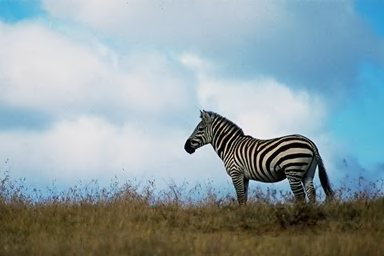

In [ ]:
img = '/content/drive/MyDrive/Dataset/Au/Au_ani_00001.jpg'
Image.open(img)

In [ ]:
img=Segmentation(img, 90)

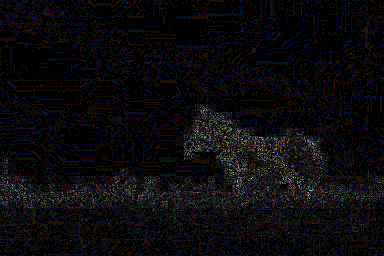

In [ ]:
img


In [ ]:
image_size = (32, 32)

In [ ]:
def prepare_image(image_path):
    return np.array(Segmentation(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:
X = [] 
Y = []

In [ ]:
path="/content/drive/MyDrive/Dataset/Au"

In [ ]:
dirs=os.listdir(path)

In [ ]:

for image in tqdm(dirs): 
  full_path = os.path.join(path, image)
  X.append(prepare_image(full_path))
  Y.append([1,0])
 

 59%|█████▉    | 2151/3656 [01:26<00:20, 71.87it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag)
100%|██████████| 3656/3656 [01:54<00:00, 31.98it/s]


In [ ]:
# !rmdir "/content/drive/MyDrive/datasetaugmentss/Augment_Au/.ipynb_checkpoints" 

In [ ]:
path="/content/drive/MyDrive/datasetaugmentss/Augment_Au"
dirs=os.listdir(path)

In [ ]:
for image in tqdm(dirs):
  full_path = os.path.join(path, image)
  X.append(prepare_image(full_path))
  Y.append([1,0])

In [ ]:
path="/content/drive/MyDrive/Dataset/spliced"
dirs=os.listdir(path)

In [ ]:

for image in tqdm(dirs):
  full_path = os.path.join(path, image)
  X.append(prepare_image(full_path))
  Y.append([0,1])

100%|██████████| 1828/1828 [00:56<00:00, 32.38it/s]


In [ ]:
path="/content/drive/MyDrive/datasetaugmentss/Augment_spliced"
dirs=os.listdir(path)

In [ ]:

for image in tqdm(dirs):
  full_path = os.path.join(path, image)
  X.append(prepare_image(full_path))
  Y.append([0,1])

In [ ]:
path="/content/drive/MyDrive/Dataset/copymove"
dirs=os.listdir(path)

In [ ]:

for image in tqdm(dirs):
  full_path = os.path.join(path, image)
  X.append(prepare_image(full_path))
  Y.append([0,1])

100%|██████████| 1828/1828 [01:01<00:00, 29.96it/s]


In [ ]:
path="/content/drive/MyDrive/datasetaugmentss/Augment_copymove"
dirs=os.listdir(path)

In [ ]:

for image in tqdm(dirs):
  full_path = os.path.join(path, image)
  X.append(prepare_image(full_path))
  Y.append([0,1])

In [ ]:

X=np.array(X)

In [ ]:
Y=np.array(Y)

In [ ]:
X.shape

(7312, 49152)

In [ ]:
X = X.reshape(-1, 128, 128, 3)


In [ ]:
X.shape

(7312, 128, 128, 3)

In [ ]:
# Y = to_categorical(Y, 2)

In [ ]:
Y.shape

(7312, 2)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(5849, 128, 128, 3)

In [ ]:

Y_train.shape

(5849, 2)

In [ ]:
X_test.shape

(1463, 128, 128, 3)

In [ ]:
Y_test.shape

(1463, 2)

In [ ]:
#normalization (scaling down, as each number between 0-255)
# X_train=X_train/255.0
# Y_train=Y_train/255.0

In [ ]:
#basic model for testing 
# cnn = models.Sequential([
#     layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu', input_shape=(128, 128, 3)),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Flatten(),
#     layers.Dense(248, activation='relu'),
#     layers.Dense(2, activation='softmax')
# ])

In [ ]:
# batchnormalization()

In [ ]:
#performing l1,l2 regularization to avoid overfitting
cnn =models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(5, 5),padding='same' ,activation='relu', input_shape=(128, 128, 3)),
    layers.Conv2D(filters=32, kernel_size=(5, 5),padding='same' ,activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(filters=64, kernel_size=(3, 3),padding='same' ,activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    layers.Dropout(0.3),
    layers.Conv2D(filters=64, kernel_size=(3, 3),padding='same' ,activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    layers.Dropout(0.3),

    #adding flatten
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l1(0.0001)),
    Dropout(0.25),
    layers.Dense(248, activation='relu',kernel_regularizer=regularizers.l1(0.0001)),
    Dropout(0.25),
    layers.Dense(2, activation='softmax')
])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [ ]:
epoch=200
batch_size =8

In [ ]:
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epoch)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# optimizer = Adam()
cnn.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                              min_delta=0.001,
                              patience =10,
                              verbose = 0,
                              mode='max')

In [ ]:
fit=cnn.fit(X_train, Y_train, epochs=epoch,batch_size =batch_size,validation_data=(X_test, Y_test),callbacks = [early_stopping])

Epoch 1/200
732/732 [==============================] - 26s 18ms/step - loss: 0.9809 - accuracy: 0.7097 - val_loss: 0.6167 - val_accuracy: 0.8052
Epoch 2/200
732/732 [==============================] - 12s 16ms/step - loss: 0.5577 - accuracy: 0.8099 - val_loss: 0.5178 - val_accuracy: 0.8257
Epoch 3/200
732/732 [==============================] - 12s 16ms/step - loss: 0.5096 - accuracy: 0.8184 - val_loss: 0.5294 - val_accuracy: 0.7984
Epoch 4/200
732/732 [==============================] - 12s 17ms/step - loss: 0.4902 - accuracy: 0.8171 - val_loss: 0.4804 - val_accuracy: 0.8237
Epoch 5/200
732/732 [==============================] - 12s 16ms/step - loss: 0.4676 - accuracy: 0.8268 - val_loss: 0.4723 - val_accuracy: 0.8257
Epoch 6/200
732/732 [==============================] - 12s 16ms/step - loss: 0.4591 - accuracy: 0.8282 - val_loss: 0.4592 - val_accuracy: 0.8284
Epoch 7/200
732/732 [==============================] - 12s 17ms/step - loss: 0.4444 - accuracy: 0.8277 - val_loss: 0.4300 - val_ac

In [ ]:
score=cnn.evaluate(X_test,Y_test)

46/46 [==============================] - 1s 20ms/step - loss: 0.3552 - accuracy: 0.8599


In [ ]:
# model accuracy
print("Accuracy:%.2f%%" % (score[1]*100))

Accuracy:85.99%


In [ ]:
print(fit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


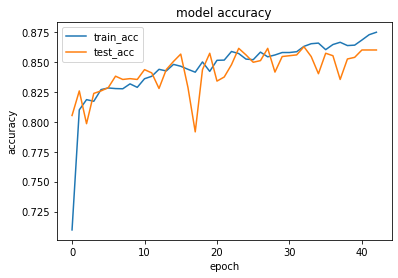

In [ ]:
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'test_acc'], loc='upper left')
plt.show()

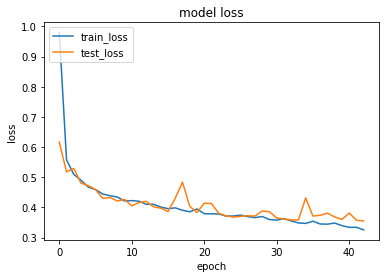

In [ ]:
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss'], loc='upper left')
plt.show()

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[9.9972004e-01, 2.7988470e-04],
       [1.6515486e-02, 9.8348457e-01],
       [2.7900714e-02, 9.7209924e-01],
       [2.2619709e-02, 9.7738034e-01],
       [8.0970960e-04, 9.9919027e-01]], dtype=float32)

In [ ]:
y_pred=[np.argmax(element) for element in y_pred]
y_pred[:10]

[0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

In [ ]:
Y_test[0]

array([1, 0])

In [ ]:
y_test=[np.argmax(element) for element in Y_test]
y_test[:10]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0]

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    return(TP, FP, TN, FN)


tp, fp, tn, fn =perf_measure(y_test,y_pred)    
print("TP: ",tp);    
print("FP: ",fp);  
print("TN: ",tn);  
print("FN: ",fn);  

TP:  671
FP:  141
TN:  587
FN:  64


In [ ]:
matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[587, 141],
       [ 64, 671]], dtype=int32)>

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       728
           1       0.83      0.91      0.87       735

    accuracy                           0.86      1463
   macro avg       0.86      0.86      0.86      1463
weighted avg       0.86      0.86      0.86      1463



Text(69.0, 0.5, 'Truth')

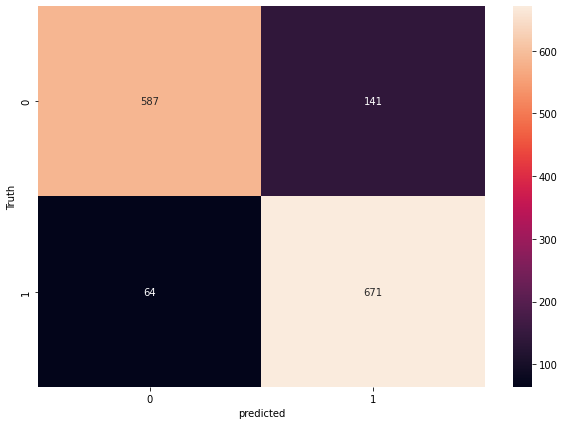

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(matrix,annot=True,fmt="d")
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
# cv2_imshow(X_train[0])
# for i in range(5):
#   cv2_imshow(X_train[i+5000])
#   # print(Y_train[i])
#   if np.argmax(Y_train[i+5000])==0:
#     print("LABEL: Authentic")
#   elif np.argmax(Y_train[i+5000])==1:
#     print("LABEL: TEMPERED")
# elif np.argmax(Y_train[i+5000])==2:
#   print("LABEL:CO)PY MOVED"

In [ ]:
classes=["Authentic","Forged"]

In [ ]:
classes[y_pred[2]]


'Forged'

In [ ]:
classes[y_test[2]]

'Forged'

In [ ]:
model_json=cnn.to_json()
with open('/content/drive/MyDrive/Colab Notebooks/model.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
cnn.save_weights('/content/drive/MyDrive/Colab Notebooks/model.h5')

second part- Identifying Between forged and spliced image

In [ ]:
X = [] 
Y = []

In [ ]:
path="/content/drive/MyDrive/Dataset/spliced"
dirs=os.listdir(path)

In [ ]:
for image in tqdm(dirs):
  full_path = os.path.join(path, image)
  X.append(prepare_image(full_path))
  Y.append([1,0])

100%|██████████| 1828/1828 [00:43<00:00, 41.83it/s]


In [ ]:
path="/content/drive/MyDrive/Dataset/copymove"
dirs=os.listdir(path)

In [ ]:
for image in tqdm(dirs):
  full_path = os.path.join(path, image)
  X.append(prepare_image(full_path))
  Y.append([0,1])

100%|██████████| 1828/1828 [00:47<00:00, 38.10it/s]


In [ ]:
X=np.array(X)

In [ ]:
Y=np.array(Y)

In [ ]:
X.shape

(3656, 3072)

In [ ]:
X = X.reshape(-1, 32, 32, 3)


In [ ]:
X.shape

(3656, 32, 32, 3)

In [ ]:
Y.shape

(3656, 2)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(2924, 32, 32, 3)

In [ ]:

Y_train.shape

(2924, 2)

In [ ]:
#performing l1,l2 regularization to avoid overfitting
cnn =models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),padding='same' ,activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3),padding='same' ,activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(filters=64, kernel_size=(3, 3),padding='same' ,activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    layers.Dropout(0.3),
    layers.Conv2D(filters=64, kernel_size=(3, 3),padding='same' ,activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    layers.Dropout(0.3),

    #adding flatten
    layers.Flatten(),
    layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l1(0.0001)),
    layers.Dense(2, activation='softmax')
])

In [ ]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

In [ ]:

epoch=100
batch_size =8

In [ ]:
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epoch)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# optimizer = Adam()
cnn.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

In [ ]:
# early_stopping = EarlyStopping(monitor = 'val_accuracy',
#                               min_delta=0.001,
#                               patience =10,
#                               verbose = 0,
#                               mode='max')

In [ ]:
fit=cnn.fit(X_train, Y_train, epochs=epoch,batch_size =batch_size,validation_data=(X_test, Y_test))

Epoch 1/100
366/366 [==============================] - 3s 6ms/step - loss: 0.7894 - accuracy: 0.5116 - val_loss: 0.7713 - val_accuracy: 0.5123
Epoch 2/100
366/366 [==============================] - 2s 6ms/step - loss: 0.7490 - accuracy: 0.5434 - val_loss: 0.7388 - val_accuracy: 0.5779
Epoch 3/100
366/366 [==============================] - 2s 5ms/step - loss: 0.7204 - accuracy: 0.5886 - val_loss: 0.7181 - val_accuracy: 0.6011
Epoch 4/100
366/366 [==============================] - 2s 5ms/step - loss: 0.7025 - accuracy: 0.6043 - val_loss: 0.7088 - val_accuracy: 0.6025
Epoch 5/100
366/366 [==============================] - 2s 6ms/step - loss: 0.6962 - accuracy: 0.5995 - val_loss: 0.7023 - val_accuracy: 0.5943
Epoch 6/100
366/366 [==============================] - 2s 6ms/step - loss: 0.6917 - accuracy: 0.6009 - val_loss: 0.6990 - val_accuracy: 0.5820
Epoch 7/100
366/366 [==============================] - 2s 6ms/step - loss: 0.6875 - accuracy: 0.6084 - val_loss: 0.6963 - val_accuracy: 0.5861

In [ ]:
score=cnn.evaluate(X_test,Y_test)

23/23 [==============================] - 0s 7ms/step - loss: 0.5982 - accuracy: 0.6721


In [ ]:
# model accuracy
print("Accuracy:%.2f%%" % (score[1]*100))

Accuracy:67.21%


In [ ]:
print(fit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


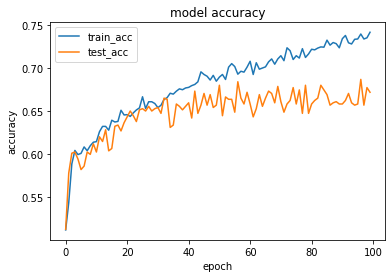

In [ ]:
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'test_acc'], loc='upper left')
plt.show()

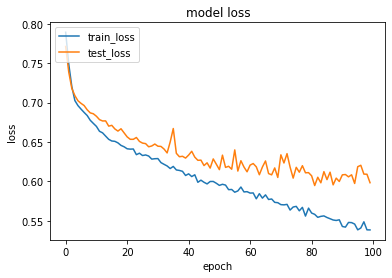

In [ ]:
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss'], loc='upper left')
plt.show()

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[0.24559455, 0.75440544],
       [0.8627312 , 0.13726877],
       [0.9553998 , 0.04460016],
       [0.84352684, 0.15647317],
       [0.25945258, 0.7405474 ]], dtype=float32)

In [ ]:
y_pred=[np.argmax(element) for element in y_pred]
y_pred[:10]

[1, 0, 0, 0, 1, 1, 1, 1, 1, 1]

In [ ]:
y_test=[np.argmax(element) for element in Y_test]
y_test[:10]

[0, 0, 0, 1, 0, 1, 1, 1, 1, 1]

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    return(TP, FP, TN, FN)


tp, fp, tn, fn =perf_measure(y_test,y_pred)    
print("TP: ",tp);    
print("FP: ",fp);  
print("TN: ",tn);  
print("FN: ",fn);  

TP:  216
FP:  103
TN:  276
FN:  137


In [ ]:
matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[276, 103],
       [137, 216]], dtype=int32)>

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       379
           1       0.68      0.61      0.64       353

    accuracy                           0.67       732
   macro avg       0.67      0.67      0.67       732
weighted avg       0.67      0.67      0.67       732



Text(69.0, 0.5, 'Truth')

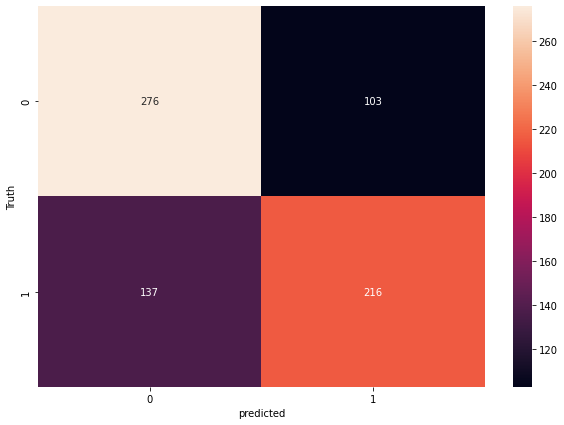

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(matrix,annot=True,fmt="d")
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
classes=["splice","Forged"]

In [ ]:
classes[y_pred[2]]


'splice'

In [ ]:
classes[y_test[2]]

'splice'